# Task A_Mean_Filter

In [40]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)

#Adjust figure sizes 
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Noisy10_ Images - Mean Filter

In [41]:
def Mean_filter(noisy_im_dir, org_im_dir, img_to_print):
    lst_mean_noisy = []
    lst_mse_3x3_filt = []
    lst_mse_5x5_filt = []
    lst_mse_7x7_filt = []

    lst_ssim_noisy = []
    lst_ssim_3x3_filt = []
    lst_ssim_5x5_filt = []
    lst_ssim_7x7_filt = []

    # Process each image
    for e, i in enumerate(os.listdir(noisy_im_dir)):

        img_name = i.split(".")[0]+".png"

        noisy_img = cv2.cvtColor(cv2.imread(os.path.join(noisy_im_dir, img_name)), cv2.COLOR_BGR2RGB)
        org_img   = cv2.cvtColor(cv2.imread(os.path.join(org_im_dir, img_name)), cv2.COLOR_BGR2RGB)
        

        #------------------------------------------------------------
        # Apply Filters
        #------------------------------------------------------------

        img_mean_3x3_filt = cv2.blur(noisy_img, (3,3))               # Mean filter with kernel 3*3
        img_mean_5x5_filt = cv2.blur(noisy_img, (5,5))               # Mean filter with kernel 5*5
#         img_mean_7x7_filt = cv2.blur(noisy_img, (7,7))               # Mean filter with kernel 7*7

        #------------------------------------------------------------
        # Mean Squared Error between Original image and filtered images
        #------------------------------------------------------------
        #

        mse_noisy = np.mean((org_img - noisy_img)**2).astype(np.uint8)
        lst_mean_noisy.append(mse_noisy)

        mse_3x3_filt = np.mean((org_img - img_mean_3x3_filt)**2).astype(np.uint8)
        lst_mse_3x3_filt.append(mse_3x3_filt)

        mse_5x5_filt = np.mean((org_img - img_mean_5x5_filt)**2).astype(np.uint8)
        lst_mse_5x5_filt.append(mse_5x5_filt)    


        #------------------------------------------------------------------------------------
        #Calcalte Structured Similarity Index with Original image and filtered images
        #------------------------------------------------------------------------------------
        ssim_noisy = ssim(org_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
        lst_ssim_noisy.append(ssim_noisy)

        ssim_3x3_filt = ssim(org_img, img_mean_3x3_filt, multichannel=True, data_range=img_mean_3x3_filt.max() - img_mean_3x3_filt.min())
        lst_ssim_3x3_filt.append(ssim_3x3_filt)

        ssim_5x5_filt = ssim(org_img, img_mean_5x5_filt, multichannel=True, data_range=img_mean_5x5_filt.max() - img_mean_5x5_filt.min())
        lst_ssim_5x5_filt.append(ssim_5x5_filt)

 
        # Display the filtered sample image
    
        if e== img_to_print:
            #------------------------------------------------------------
            # Display images
            #------------------------------------------------------------
            rcParams['figure.figsize'] = [12, 8]
            plt.rcParams['figure.dpi'] = 100            

            plt.subplot(131), plt.imshow(noisy_img)
            plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_noisy}, SSIM: {ssim_noisy:.2f}')

            plt.subplot(132), plt.imshow(img_mean_3x3_filt)
            plt.title('Mean 3x3 filtered img'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_3x3_filt}, SSIM: {ssim_3x3_filt:.2f}')

            plt.subplot(133), plt.imshow(img_mean_5x5_filt)
            plt.title('Mean 5x5 filtered img'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_5x5_filt}, SSIM: {ssim_5x5_filt:.2f}')

            plt.show()

    
    #------------------------------------
    # Plots
    #------------------------------------
    #Adjust figure sizes
    rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 100
    X_axis=np.arange(0,25)
    X_axis1 = X_axis
    X_axis2 = X_axis + 0.2
    X_axis3 = X_axis+0.2*2
#     X_axis4 = X_axis+0.2*3

    #------------------------------------------------------------
    # Plot Mean Squared Error for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_mean_noisy, 0.2, label='Noisy Img')
    plt.bar(X_axis2, lst_mse_3x3_filt, 0.2, label='3x3_filt')
    plt.bar(X_axis3, lst_mse_5x5_filt, 0.2, label='5x5_filt')
#     plt.bar(X_axis4, lst_mse_7x7_filt, 0.2, label='7x7_filt')
    plt.xlabel('Image Number')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error')
    plt.legend()
    plt.show()

    #------------------------------------------------------------
    # Plot Structued Similarity Index for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_ssim_noisy, 0.2, label='Noisy Img')
    plt.bar(X_axis2, lst_ssim_3x3_filt, 0.2, label='3x3_filt')
    plt.bar(X_axis3, lst_ssim_5x5_filt, 0.2, label='5x5_filt')
#     plt.bar(X_axis4, lst_ssim_7x7_filt, 0.2, label='7x7_filt')
    plt.xlabel('Image Number')
    plt.ylabel('SSIM')
    plt.title('Structued Similarity Index')
    plt.legend()
    plt.show()
    
    # Return the results of filters 3x3 and 5x5
    return lst_mse_3x3_filt, lst_mse_5x5_filt, lst_ssim_3x3_filt, lst_ssim_5x5_filt, lst_mean_noisy, lst_ssim_noisy

## Noisy10_ Images - Mean Filter

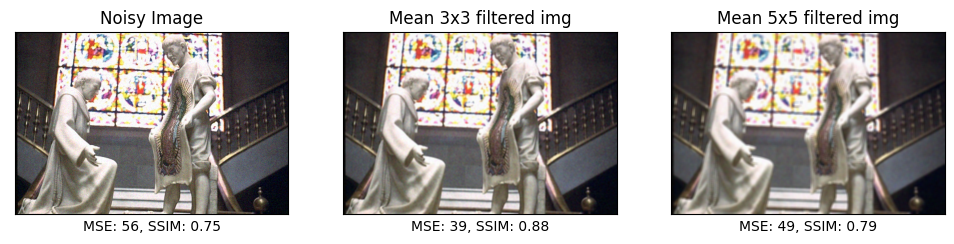

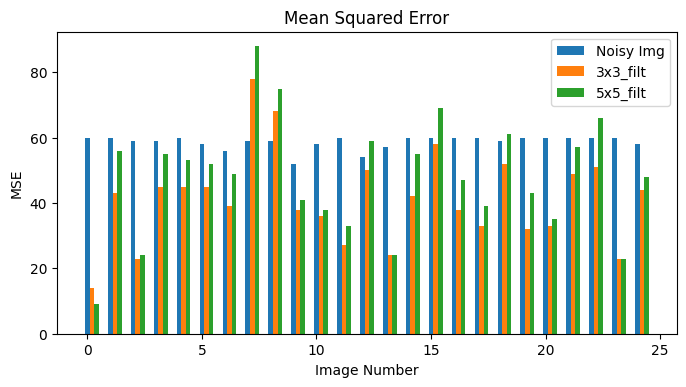

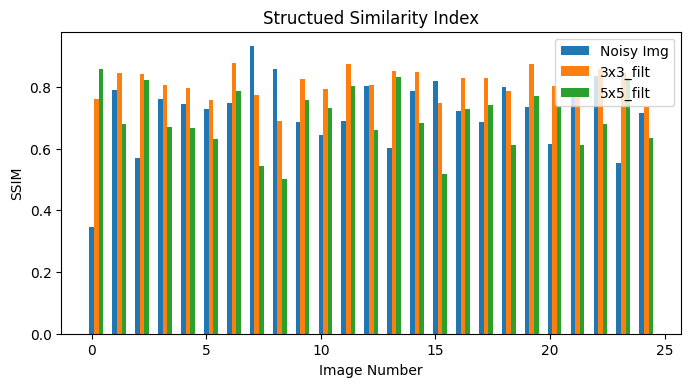

In [42]:
#Access image datasets
noisy10_im_dir = 'Task-A-Dataset-denoising\\noisy10'   # Noisy Images
org_im_dir = 'Task-A-Dataset-denoising\\original'      # Original Images
img_to_print = 6                                       # Sample image to be printed

n10_mse_mean_3x3, n10_mse_mean_5x5, n10_ssim_mean_3x3, n10_ssim_mean_5x5, n10_mean_noisy, n10_ssim_noisy = Mean_filter( \
    noisy10_im_dir, org_im_dir, img_to_print)
                                                   

## Noisy25_ Images - Mean Filter

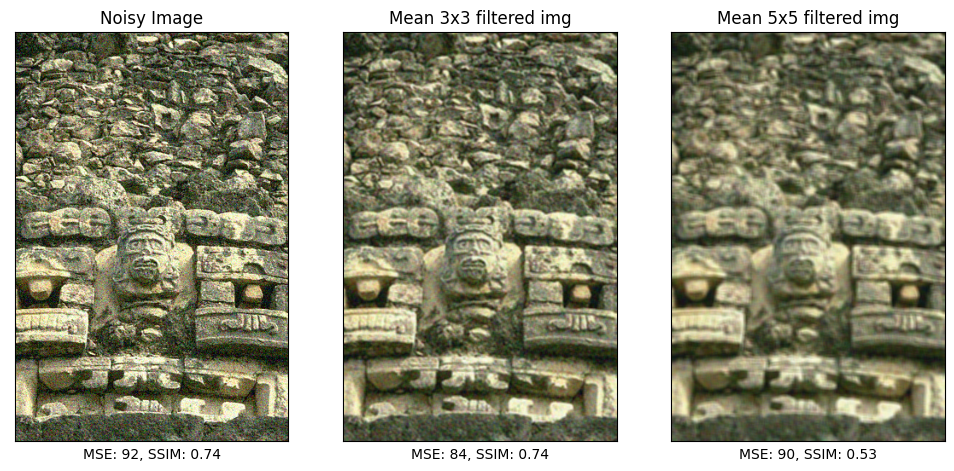

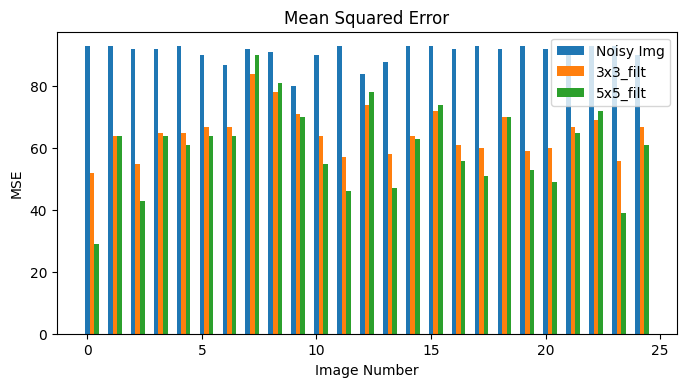

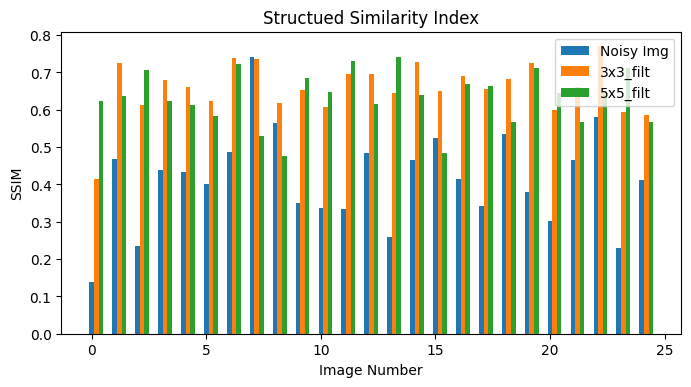

In [43]:
#Access image datasets
noisy25_im_dir = "Task-A-Dataset-denoising\\noisy25"        # Noisy Images
org_im_dir = "Task-A-Dataset-denoising\\original"           # Original Images
img_to_print = 7                                            # Sample image to be printed

n25_mse_mean_3x3, n25_mse_mean_5x5, n25_ssim_mean_3x3, n25_ssim_mean_5x5, n25_mean_noisy, n25_ssim_noisy = Mean_filter(noisy25_im_dir, \
                                                                                           org_im_dir, img_to_print)

## Noisy50_ Images - Mean Filter

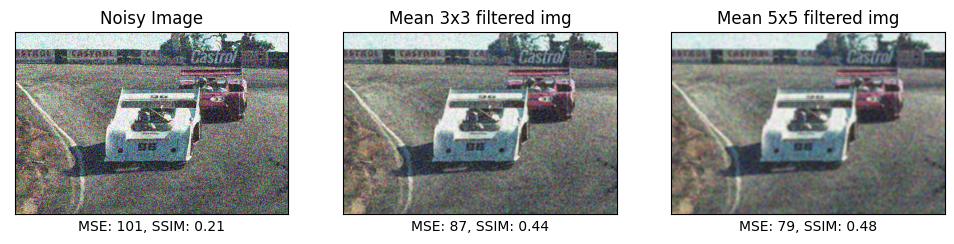

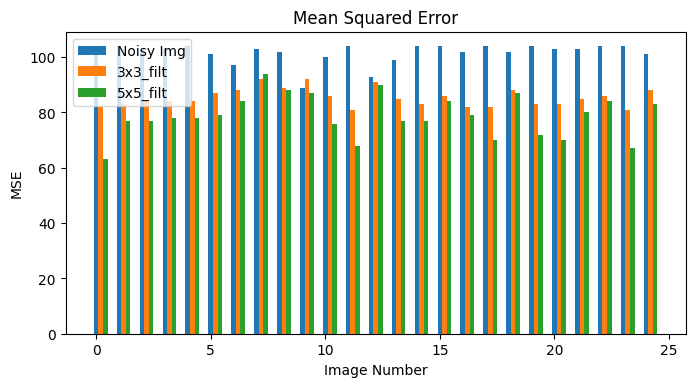

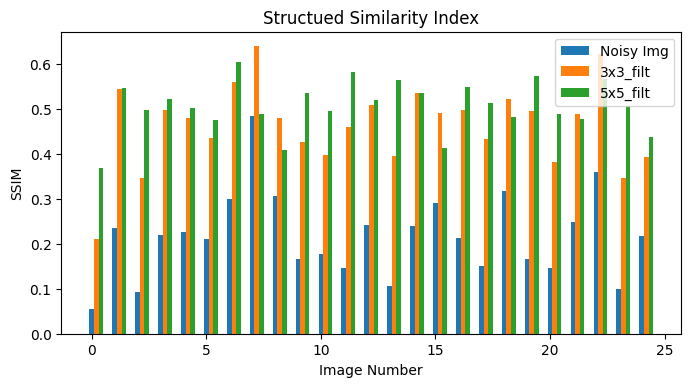

In [44]:
#Access image datasets
noisy50_im_dir = "Task-A-Dataset-denoising\\noisy50"      # Noisy Images
org_im_dir = "Task-A-Dataset-denoising\\original"         # Original Images
img_to_print = 5                                          # Sample image to be printed

n50_mse_mean_3x3, n50_mse_mean_5x5, n50_ssim_mean_3x3, n50_ssim_mean_5x5, n50_mean_noisy, n50_ssim_noisy = Mean_filter(noisy50_im_dir, \
                                                                                           org_im_dir, img_to_print)